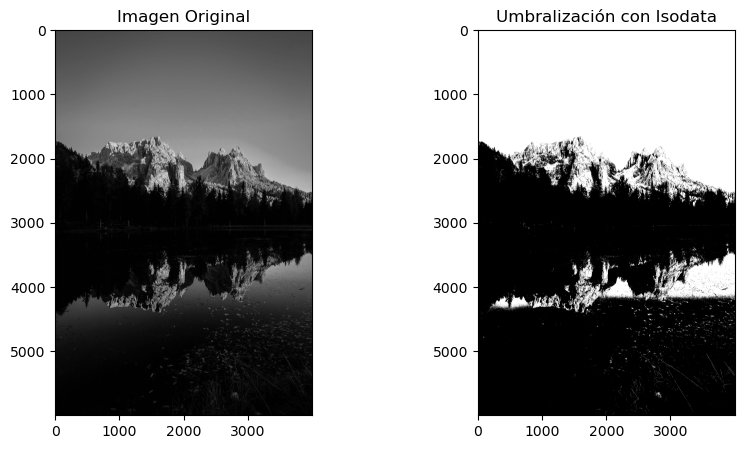

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# imagen en canal 0
imagen = cv2.imread('..//img/ungaro.jpg', 0)

# llamamos a funcion con imagen seleccionada 
umbral_isodata = isodata(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Isodata')


plt.show()

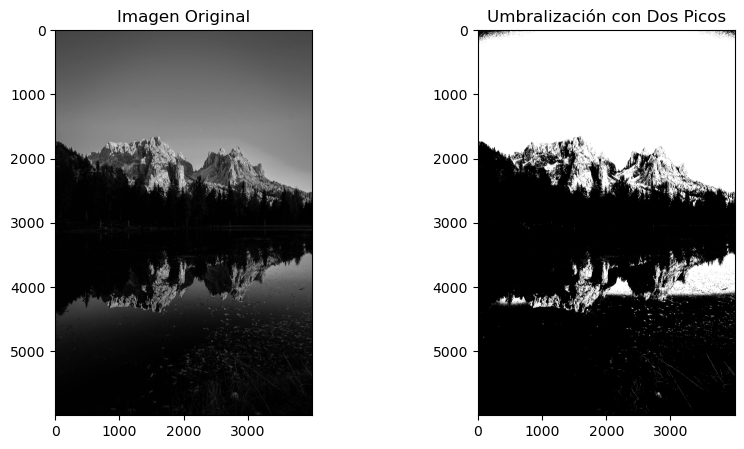

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

# Cargamos la imagen en escala de grises
imagen = cv2.imread('..//img/ungaro.jpg', 0)

# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_dos_picos, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')


plt.show()

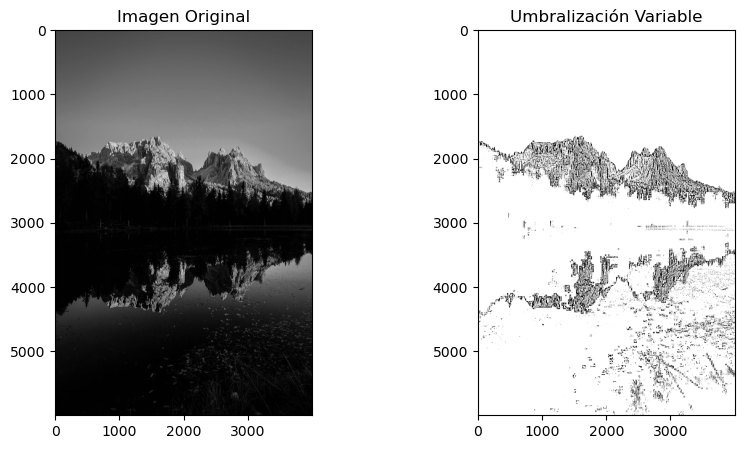

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#variable por bloques

image = cv2.imread('..//img/ungaro.jpg', 0) 
# Función para calcular el umbral variable utilizando la técnica de partición
def variable_threshold(image, block_size, c):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y parámetro de compensación
block_size = 25
c = 10
# Aplicar umbralización variable
threshold_image = variable_threshold(image, block_size, c)
# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable')
plt.show()

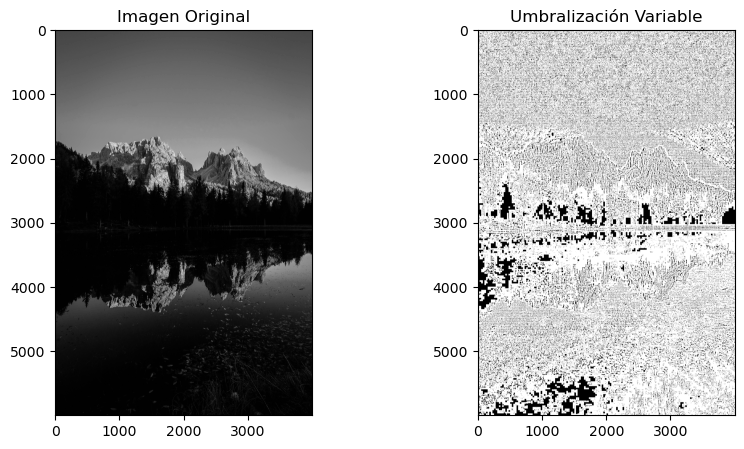

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#variables locales

image = cv2.imread('..//img/ungaro.jpg', 0) 
# Función para calcular el umbral variable utilizando la técnica de variables locales
def local_threshold(image, block_size, threshold_offset):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y offset de umbral
block_size = 25
threshold_offset = 0.8
# Aplicar umbralización variable
threshold_image = local_threshold(image, block_size, threshold_offset)
# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable')
plt.show()

In [36]:
def imagenTrunc(img):
    return cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)

def imagenTozero(img):
    return cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO)

def imagenTozeroInv(img):
    return cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO_INV)

def umbralBinario(img):
    return cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

def umbralBinarioInv(img):
    return cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

def umbralAdaptativoMean(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

def umbralAdaptativoGaussiano(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

def umbralIsodata(img):
    umbral_isodata = isodata(img)
    return cv2.threshold(img, umbral_isodata, 255, cv2.THRESH_BINARY)

def umbralDosPicos(img):
    umbral_dos_picos = dos_picos(img)
    return cv2.threshold(img, umbral_dos_picos, 255, cv2.THRESH_BINARY)

def umbralVariable(img):
    umbral_variable = variable_threshold(img, 25, 10)  
    return umbral_variable

def umbralLocal(img):
    umbral_local = local_threshold(img, 25, 0.8)  
    return umbral_local



In [46]:
def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T
    
def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result




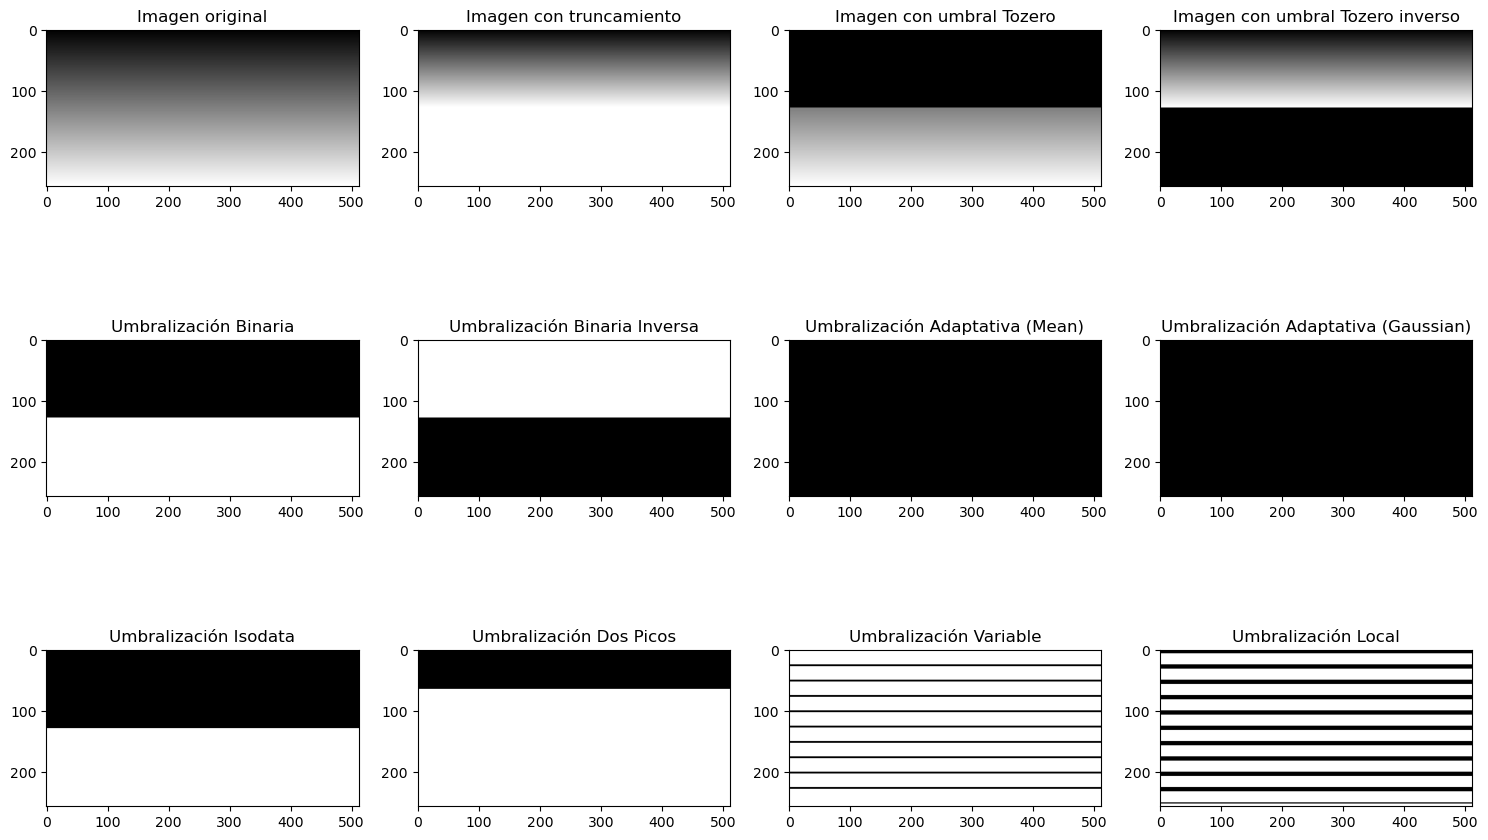

In [50]:
array = get_gradient_3d(512, 256, (0, 0, 0), (255, 255, 255), (False, False, False))
imgensita = Image.fromarray(np.uint8(array))
imgensita = np.array(imgensita)
imgensita_gray = cv2.cvtColor(imgensita, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.title('Imagen original')
plt.imshow(imgensita_gray, cmap='gray')

_, imgTrunc = imagenTrunc(imgensita_gray)
plt.subplot(3, 4, 2)
plt.title('Imagen con truncamiento')
plt.imshow(imgTrunc, cmap='gray')

_, imgTozero = imagenTozero(imgensita_gray)
plt.subplot(3, 4, 3)
plt.title('Imagen con umbral Tozero')
plt.imshow(imgTozero, cmap='gray')

_, imgTozeroInv = imagenTozeroInv(imgensita_gray)
plt.subplot(3, 4, 4)
plt.title('Imagen con umbral Tozero inverso')
plt.imshow(imgTozeroInv, cmap='gray')

_, umbralB = umbralBinario(imgensita_gray)
plt.subplot(3, 4, 5)
plt.title('Umbralización Binaria')
plt.imshow(umbralB, cmap='gray')

_, umbralBinv = umbralBinarioInv(imgensita_gray)
plt.subplot(3, 4, 6)
plt.title('Umbralización Binaria Inversa')
plt.imshow(umbralBinv, cmap='gray')

umb_adap = umbralAdaptativoMean(imgensita_gray)
plt.subplot(3, 4, 7)
plt.title('Umbralización Adaptativa (Mean)')
plt.imshow(umb_adap, cmap='gray')

umb_adap_gaus = umbralAdaptativoGaussiano(imgensita_gray)
plt.subplot(3, 4, 8)
plt.title('Umbralización Adaptativa (Gaussian)')
plt.imshow(umb_adap_gaus, cmap='gray')

_, umb_isodata = umbralIsodata(imgensita_gray)
plt.subplot(3, 4, 9)
plt.title('Umbralización Isodata')
plt.imshow(umb_isodata, cmap='gray')

_, umb_dos_picos = umbralDosPicos(imgensita_gray)
plt.subplot(3, 4, 10)
plt.title('Umbralización Dos Picos')
plt.imshow(umb_dos_picos, cmap='gray')

umb_variable = umbralVariable(imgensita_gray)
plt.subplot(3, 4, 11)
plt.title('Umbralización Variable')
plt.imshow(umb_variable, cmap='gray')

umb_local = umbralLocal(imgensita_gray)
plt.subplot(3, 4, 12)
plt.title('Umbralización Local')
plt.imshow(umb_local, cmap='gray')

plt.tight_layout()
plt.show()